# Intro to Image Processing: An Image as Numbers

### **Purpose**: To view an image from a computers perspective (as an array of numbers)



Created by: Hawley Helmbrecht

Creation Date: 07/21/2020

Last Update:

*Step 1: Necessary Imports*

In this step, we import all the packages that we will need later on in the document.  

We decide to do this all at once rather than throughout because it is standard coding practice that helps create clean code.

In [1]:
import numpy as np
from skimage import io #importing a specific module from scikit-imgae

import matplotlib.pyplot as plt

*Step 2: User Inputs*

When creating Jupyter Notebooks for use by collaborators and experamentalists, I find it best practice to have a step near the top specifically for the imuts they need for the notebook.

In this case, the only input needed is the location of location of the cell.tif file included in this repository.

In [2]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Reading in the image*

The image doesn't exist within the Jupyter Notebook until you actually "read" it into the notebooks data storage. To do that we use the scikit-image command io.imread

Go ahead and check the imports to see that from skimage (scikit-image) we imported the io module

In [3]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

A huge part of image processing work is to build in actual visual checks of your image. It is easy to get lost in a long session of coding with the assumption that the code is working how you would expect it to. Only to look at the image at the end of the day and have no idea where you went wrong.

When I am working on new projects (such as your new project reading an image into a Jupyter Notebook), I build a lot of these "visual" checks in.

*Step 4a: Viewing the Image as the notebook sees it*

In [16]:
cell_im

array([[[ 17,  25,   0],
        [134, 101,  22],
        [  0,  65,  16],
        ...,
        [251,  16,  26],
        [268,  11,  32],
        [261,   0,  19]],

       [[100, 122,   0],
        [ 31, 136,  16],
        [ 57,  74,  11],
        ...,
        [ 79,  14,   0],
        [298,   8,  27],
        [277,  11,  31]],

       [[101,  29,   5],
        [ 10,  84,   0],
        [ 35, 111,  11],
        ...,
        [240,  22,   7],
        [181,   0,   9],
        [256,  15,  29]],

       ...,

       [[ 24,  22,  10],
        [ 16, 140,   9],
        [ 70,  78,   2],
        ...,
        [103,  11,   7],
        [  3,   7,   2],
        [ 33,   0,   4]],

       [[ 17,  80,  10],
        [  5,  59,   6],
        [  0, 102,   3],
        ...,
        [ 15,   8,   8],
        [ 31,  11,  14],
        [137,  15,   0]],

       [[ 62,  27,  18],
        [ 38,  52,   1],
        [ 13,  27,   0],
        ...,
        [ 42,   0,   9],
        [ 33,   1,   9],
        [ 81,   0,   0]]

When you run the above cell in Jupyter notebook, you should see an array of numbers!

These numbers correlate to pixel values - where pixels are the tiny individual squares that make up an image.  Image building a square made with 1X1 legos. These would correspond to the pixels and the color of each lego corresponds to a specific number

In this case our numbers can go anywhere from 0 to 255. Where 0 is actually black and 255 is white and everything else is a value in between!

If you read the last statement and think about it in terms of colors though it may get confusing...

The 0 to 255 scale in these images actually correlates to tones. Color is represented by different "channels"

Run the next line of code to get the computers version of these channels

In [17]:
cell_im.shape

(512, 512, 3)

The above code uses the function 'shape' in order to take a look at the data of the variable input so variable.function 

In this case, the shape of our cell image is 512 by 512 by 3.  For us this means it is a 512 pixel by 512 pixel image with 3 color channges (red, green, blue)

**If we want to, we can split these color channels using the code below!**
 
To do that we declare the name of the image 'cell_im' then use square brackets to pick which axis we want to split the image by.

The colon here means we want all of the values in that dimension - so we use it for both x and y to get 512x512 images of each color.

Keep in mind that in Python arrays start at zero so when splitting the images our first channel is actually 0 and not 1!

In [22]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

Now we can look at the colors as individual arrays rather than as a set of 3 arrays

In [46]:
red_cell_im

array([[ 17, 134,   0, ..., 251, 268, 261],
       [100,  31,  57, ...,  79, 298, 277],
       [101,  10,  35, ..., 240, 181, 256],
       ...,
       [ 24,  16,  70, ..., 103,   3,  33],
       [ 17,   5,   0, ...,  15,  31, 137],
       [ 62,  38,  13, ...,  42,  33,  81]], dtype=uint16)

In [47]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

In [48]:
blue_cell_im

array([[ 0, 22, 16, ..., 26, 32, 19],
       [ 0, 16, 11, ...,  0, 27, 31],
       [ 5,  0, 11, ...,  7,  9, 29],
       ...,
       [10,  9,  2, ...,  7,  2,  4],
       [10,  6,  3, ...,  8, 14,  0],
       [18,  1,  0, ...,  9,  9,  0]], dtype=uint16)

*Step 4b: Viewing the image in a way that makes sense to us*

Let's start by viewing the iamage with all the channels at once

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


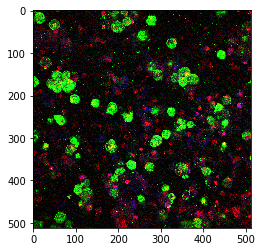

In [25]:
plt.imshow(cell_im)

Now let's split the channels (something immensely helpful in image processing)

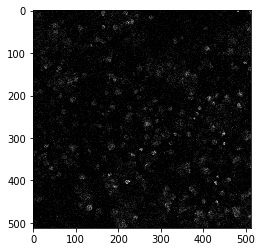

In [45]:
plt.imshow(red_cell_im, cmap='gray')

What if we wanted to view them all together?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


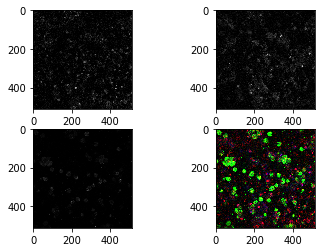

In [43]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(red_cell_im, cmap='gray')
ax[1,0].imshow(green_cell_im, cmap='gray')
ax[0,1].imshow(blue_cell_im, cmap='gray')
ax[1,1].imshow(cell_im)

What if we wanted that view to be a little cleaner?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'All Channels')

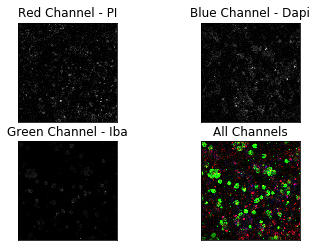

In [57]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(red_cell_im, cmap='gray')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].set_title('Red Channel - PI')


ax[1,0].imshow(green_cell_im, cmap='gray')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].set_title('Green Channel - Iba1')

ax[0,1].imshow(blue_cell_im, cmap='gray')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].set_title('Blue Channel - Dapi')

ax[1,1].imshow(cell_im)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

That is all for today's Module!! Next module we get into the power of Thresholding!